### Task 1

In [1]:
import pandas as pd
# loading data
msa1_path = "MSA1.xlsx"
msa2_path = "MSA2.xlsx"

In [2]:
# 'Property Status' sheets
msa1_status = pd.read_excel(msa1_path, sheet_name="Property Status", skiprows=2)
msa2_status = pd.read_excel(msa2_path, sheet_name="Property Status", skiprows=2)

In [3]:
#  each with a tag -  Market name
msa1_status["Market"] = "Austin-Round Rock, TX"
msa2_status["Market"] = "Akron, OH"

In [4]:
status_df = pd.concat([msa1_status, msa2_status], ignore_index=True)

In [5]:
status_df

,MarketCode,MarketName,StateCode,StateName,CountyCode,CountyName,TractCode,BlockGroupCode,Latitude,Longitude,...,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Market
0,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,305.0,2.0,30.30917,-97.72881,...,S,S,S,S,S,S,S,S,S,"Austin-Round Rock, TX"
1,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,1716.0,2.0,30.36687,-97.79303,...,S,S,S,S,S,S,S,S,S,"Austin-Round Rock, TX"
2,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,1860.0,2.0,30.45009,-97.64873,...,S,S,S,S,S,S,S,S,S,"Austin-Round Rock, TX"
3,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,604.0,3.0,30.28462,-97.74723,...,S,S,S,S,S,S,S,S,S,"Austin-Round Rock, TX"
4,12420,"Austin-Round Rock, TX",TX,Texas,491,Williamson,20312.0,2.0,30.57164,-97.87028,...,S,S,S,S,S,S,S,S,S,"Austin-Round Rock, TX"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,10420,"Akron, OH",OH,Ohio,133,Portage,600800.0,1.0,41.16758,-81.23151,...,S,S,S,S,S,S,S,S,S,"Akron, OH"
964,10420,"Akron, OH",OH,Ohio,133,Portage,600401.0,1.0,41.26366,-81.36410,...,NaN,NaN,S,S,S,S,S,S,S,"Akron, OH"
965,10420,"Akron, OH",OH,Ohio,153,Summit,506100.0,6.0,41.11091,-81.57355,...,S,S,S,S,S,S,S,S,S,"Akron, OH"
966,10420,"Akron, OH",OH,Ohio,153,Summit,530603.0,1.0,41.17923,-81.48822,...,S,S,S,S,S,S,S,S,S,"Akron, OH"


In [6]:
date_like_columns = [col for col in status_df.columns if isinstance(col, str) and "-" in col and col[:3].isalpha()]

In [7]:
status_long = status_df.melt(
    id_vars=[col for col in status_df.columns if col not in date_like_columns],
    value_vars=date_like_columns,
    var_name="Month",
    value_name="MonthlyStatus"
)

In [8]:
status_long

,MarketCode,MarketName,StateCode,StateName,CountyCode,CountyName,TractCode,BlockGroupCode,Latitude,Longitude,...,Rehab2,Rehab3,Quantity,AreaPerUnit,Level,Neighborhood,Status,Market,Month,MonthlyStatus
0,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,305.0,2.0,30.30917,-97.72881,...,NaN,NaN,30,603,3,NaN,S,"Austin-Round Rock, TX",Apr-08,NaN
1,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,1716.0,2.0,30.36687,-97.79303,...,NaN,NaN,458,1065,4,NaN,S,"Austin-Round Rock, TX",Apr-08,S
2,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,1860.0,2.0,30.45009,-97.64873,...,NaN,NaN,104,750,2,NaN,S,"Austin-Round Rock, TX",Apr-08,S
3,12420,"Austin-Round Rock, TX",TX,Texas,453,Travis,604.0,3.0,30.28462,-97.74723,...,NaN,NaN,135,772,5,NaN,S,"Austin-Round Rock, TX",Apr-08,NaN
4,12420,"Austin-Round Rock, TX",TX,Texas,491,Williamson,20312.0,2.0,30.57164,-97.87028,...,NaN,NaN,240,1098,3,NaN,S,"Austin-Round Rock, TX",Apr-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145195,10420,"Akron, OH",OH,Ohio,133,Portage,600800.0,1.0,41.16758,-81.23151,...,NaN,NaN,204,848,3,NaN,S,"Akron, OH",Sep-20,S
145196,10420,"Akron, OH",OH,Ohio,133,Portage,600401.0,1.0,41.26366,-81.36410,...,NaN,NaN,120,737,2,NaN,S,"Akron, OH",Sep-20,S
145197,10420,"Akron, OH",OH,Ohio,153,Summit,506100.0,6.0,41.11091,-81.57355,...,NaN,NaN,344,730,2,NaN,S,"Akron, OH",Sep-20,S
145198,10420,"Akron, OH",OH,Ohio,153,Summit,530603.0,1.0,41.17923,-81.48822,...,NaN,NaN,294,975,3,NaN,S,"Akron, OH",Sep-20,S


In [9]:
# Month to datetime
status_long["Month"] = pd.to_datetime(status_long["Month"], format="%b-%y", errors="coerce")
status_long = status_long.dropna(subset=["Month"])

In [10]:
# filter for LU or UC/LU (delivered)
delivered_props = status_long[status_long["MonthlyStatus"].isin(["LU", "UC/LU"])]


In [11]:
first_delivery = delivered_props.sort_values(by=["ProjID", "Month"]).groupby("ProjID").first().reset_index()

## Properties delivered since April 2008 in the two markets.

In [12]:
# filter properties delivered since April 2008
delivered_since_2008 = first_delivery[first_delivery["Month"] >= "2008-04-01"]

In [13]:
print(f"Delivered properties since April 2008: {len(delivered_since_2008)}")
print(delivered_since_2008[['ProjID', 'Market', 'Month', 'MonthlyStatus']].head())

Delivered properties since April 2008: 298
   ProjID                 Market      Month MonthlyStatus
0   13268  Austin-Round Rock, TX 2008-04-01            LU
1   18255  Austin-Round Rock, TX 2008-04-01            LU
2   18272  Austin-Round Rock, TX 2008-10-01         UC/LU
3   19035  Austin-Round Rock, TX 2008-04-01            LU
4   19124  Austin-Round Rock, TX 2008-04-01         UC/LU


In [14]:
# 'Occ & Concession' sheets
msa1_occ = pd.read_excel(msa1_path, sheet_name="Occ & Concession", skiprows=2)
msa2_occ = pd.read_excel(msa2_path, sheet_name="Occ & Concession", skiprows=2)

In [15]:
#  Market labels
msa1_occ["Market"] = "Austin-Round Rock, TX"
msa2_occ["Market"] = "Akron, OH"

In [16]:
occ_df = pd.concat([msa1_occ, msa2_occ], ignore_index=True)
occ_month_cols = [col for col in occ_df.columns if isinstance(col, str) and "-" in col and col[:3].isalpha()]


In [17]:
# melting
occ_long = occ_df.melt(
    id_vars=[col for col in occ_df.columns if col not in occ_month_cols],
    value_vars=occ_month_cols,
    var_name="Month",
    value_name="Occupancy"
)

In [18]:
#  Month to datetime
occ_long["Month"] = pd.to_datetime(occ_long["Month"], format="%b-%y", errors="coerce")
occ_long = occ_long.dropna(subset=["Month"])

In [19]:
# join with delivery dates
delivery_info = delivered_since_2008[["ProjID", "Market", "Month"]].rename(columns={"Month": "DeliveryDate"})
merged = pd.merge(occ_long, delivery_info, on="ProjID", how="inner")

In [20]:
# filter only dates after or equal to delivery
merged = merged[merged["Month"] >= merged["DeliveryDate"]]

In [21]:
#  first date where occupancy >= 0.90
def get_lease_up_time(group):
    reached_90 = group[group["Occupancy"] >= 0.9]
    if not reached_90.empty:
        lease_up_date = reached_90.iloc[0]["Month"]
        return (lease_up_date.to_period("M") - group.iloc[0]["DeliveryDate"].to_period("M")).n
    else:
        return None

In [22]:
lease_up_times = merged.groupby("ProjID").apply(get_lease_up_time).reset_index()
lease_up_times.columns = ["ProjID", "LeaseUpTime"]

In [23]:
# joining with Market info
lease_up_with_market = pd.merge(lease_up_times, delivery_info, on="ProjID", how="left")

## Average lease-up time for these markets.

In [24]:
# separating by Market and calculate average lease-up time
avg_lease_up = lease_up_with_market.groupby("Market")["LeaseUpTime"].mean().reset_index()
print("Average Lease-Up Time (in months):")
print(avg_lease_up)

Average Lease-Up Time (in months):
                  Market  LeaseUpTime
0              Akron, OH     8.000000
1  Austin-Round Rock, TX    12.870445


In [25]:
# load Rent Data
msa1_rent = pd.read_excel(msa1_path, sheet_name="Rent", skiprows=2)
msa2_rent = pd.read_excel(msa2_path, sheet_name="Rent", skiprows=2)
msa1_rent["Market"] = "Austin-Round Rock, TX"
msa2_rent["Market"] = "Akron, OH"
rent_df = pd.concat([msa1_rent, msa2_rent], ignore_index=True)

In [26]:
# melting into long format
rent_month_cols = [col for col in rent_df.columns if isinstance(col, str) and "-" in col and col[:3].isalpha()]
rent_long = rent_df.melt(
    id_vars=[col for col in rent_df.columns if col not in rent_month_cols],
    value_vars=rent_month_cols,
    var_name="Month",
    value_name="Rent"
)
rent_long["Month"] = pd.to_datetime(rent_long["Month"], format="%b-%y", errors="coerce")
rent_long = rent_long.dropna(subset=["Month"])


In [27]:
#compute the LeaseUpDate per property
lease_up_with_market["LeaseUpDate"] = lease_up_with_market.apply(
    lambda row: row["DeliveryDate"] + pd.DateOffset(months=row["LeaseUpTime"]) if pd.notnull(row["LeaseUpTime"]) else None,
    axis=1
)

In [28]:
# merging rent data to get delivery and lease-up rents
rent_joined = pd.merge(rent_long, lease_up_with_market, on="ProjID", how="inner")

In [29]:
# keeping rows corresponding to delivery or lease-up months
delivery_rents = rent_joined[rent_joined["Month"] == rent_joined["DeliveryDate"]][["ProjID", "Rent"]].rename(columns={"Rent": "RentAtDelivery"})
leaseup_rents = rent_joined[rent_joined["Month"] == rent_joined["LeaseUpDate"]][["ProjID", "Rent"]].rename(columns={"Rent": "RentAtLeaseUp"})

In [30]:
# merge both rent points
rent_change = pd.merge(delivery_rents, leaseup_rents, on="ProjID", how="inner")
rent_change["RentGrowth"] = (rent_change["RentAtLeaseUp"] - rent_change["RentAtDelivery"]) / rent_change["RentAtDelivery"]


In [31]:
# identify properties with negative rent growth
negative_growth = rent_change[rent_change["RentGrowth"] < 0]


In [32]:
# merge with Market info for context
negative_growth = pd.merge(negative_growth, lease_up_with_market[["ProjID", "Market"]], on="ProjID", how="left")

##  Properties having negative effective rent growth during lease-up

In [33]:
# final result
print(f"Properties with negative effective rent growth during lease-up: {len(negative_growth)}")
print(negative_growth[['ProjID', 'Market', 'RentAtDelivery', 'RentAtLeaseUp', 'RentGrowth']].head())

Properties with negative effective rent growth during lease-up: 89
   ProjID                 Market  RentAtDelivery  RentAtLeaseUp  RentGrowth
0   48136  Austin-Round Rock, TX          2197.0         2166.0   -0.014110
1   19410  Austin-Round Rock, TX          2012.0         1999.0   -0.006461
2   34139  Austin-Round Rock, TX          1428.0         1414.0   -0.009804
3   19035  Austin-Round Rock, TX          2479.0         2069.0   -0.165389
4   53644  Austin-Round Rock, TX          1109.0         1049.0   -0.054103


## Feature Engineering

In [34]:
delivery_info = delivery_info.merge(
    status_df[['ProjID', 'YearBuilt', 'Submarket']], on='ProjID', how='left'
)
# feature 1: Age at Delivery
delivery_info['YearBuilt'] = pd.to_numeric(delivery_info['YearBuilt'], errors='coerce')
delivery_info['AgeAtDelivery'] = delivery_info['DeliveryDate'].dt.year - delivery_info['YearBuilt']

# feature 2: Season of Delivery
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

delivery_info['SeasonOfDelivery'] = delivery_info['DeliveryDate'].dt.month.apply(get_season)

# feature 3: Submarket Competition (other deliveries within ±6 months in same submarket)
def count_competition(row):
    sub_df = delivery_info[delivery_info['Submarket'] == row['Submarket']]
    return sub_df[
        (sub_df['DeliveryDate'] >= row['DeliveryDate'] - pd.DateOffset(months=6)) &
        (sub_df['DeliveryDate'] <= row['DeliveryDate'] + pd.DateOffset(months=6)) &
        (sub_df['ProjID'] != row['ProjID'])
    ].shape[0]

delivery_info['SubmarketCompetition'] = delivery_info.apply(count_competition, axis=1)

# feature 4: Rent at Delivery
if 'RentAtDelivery' not in delivery_info.columns:
    delivery_info = delivery_info.merge(delivery_rents, on='ProjID', how='left')

# feature 5: Avg. Occupancy in First 3 Months After Delivery
occ_with_delivery = pd.merge(
    occ_long, delivery_info[['ProjID', 'DeliveryDate']], on='ProjID', how='inner'
)

# months within 3 months post-delivery
occ_with_delivery = occ_with_delivery[
    (occ_with_delivery['Month'] > occ_with_delivery['DeliveryDate']) &
    (occ_with_delivery['Month'] <= occ_with_delivery['DeliveryDate'] + pd.DateOffset(months=3))
]
avg_occ = occ_with_delivery.groupby('ProjID')['Occupancy'].mean().reset_index()
avg_occ.columns = ['ProjID', 'AvgOcc_3Mo_PostDelivery']
# merge into delivery_info
delivery_info = delivery_info.merge(avg_occ, on='ProjID', how='left')

## Clustering

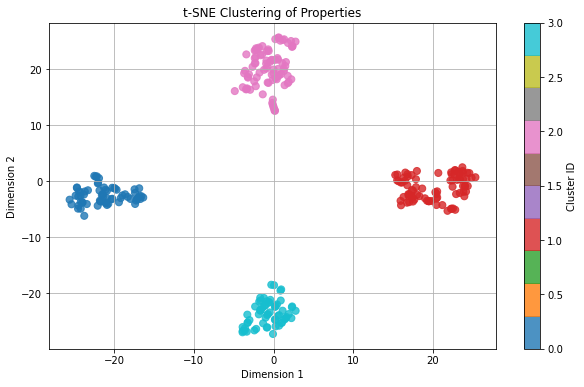

In [35]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

#  prepare features
features = delivery_info[[
    'AgeAtDelivery',
    'RentAtDelivery',
    'AvgOcc_3Mo_PostDelivery',
    'SubmarketCompetition',
    'SeasonOfDelivery'
]].copy()

# 0ne hot encoding
features = pd.get_dummies(features, columns=['SeasonOfDelivery'])

# drop missing values
features = features.dropna()
ProjIDs = delivery_info.loc[features.index, 'ProjID']

# standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# t-SNE Embedding
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embedding = tsne.fit_transform(scaled_features)

#Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embedding)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters, cmap='tab10', s=50, alpha=0.8)
plt.title("t-SNE Clustering of Properties")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()
delivery_info.loc[features.index, 'Cluster'] = clusters


In [36]:
tsne = TSNE(n_components=2, random_state=42)
tsne_embedding = tsne.fit_transform(scaled_features)  # or whatever your feature matrix is
delivery_info.loc[features.index, 'tSNE1'] = tsne_embedding[:, 0]
delivery_info.loc[features.index, 'tSNE2'] = tsne_embedding[:, 1]
delivery_info.to_csv("final_delivery_info.csv", index=False)
print("CSV exported: final_delivery_info.csv")


CSV exported: final_delivery_info.csv


In [37]:
delivery_info["Cluster"]

0      2.0
1      2.0
2      3.0
3      2.0
4      2.0
      ... 
293    1.0
294    1.0
295    1.0
296    1.0
297    1.0
Name: Cluster, Length: 298, dtype: float64